# Projekt

### Bootcamp Data Science gr II Katowice

##### Przewidywanie udzielenia pożyczki klientowi

Zmienne wejściowe :

- ID - Unique ID (Liczba porządkowa)
- Gender- Sex [Female = 0, Male = 1]
- City - Current City [Ranking miast według liczby wystąpień, liczba najpopularniejszych : CITY_TRESHOLD, pozostałe 'OTHER']
- Monthly_Income - Monthly Income in rupees
- DOB - Date of Birth [] 
- Lead_Creation_Date - Lead Created on date
- Loan_Amount_Applied - Loan Amount Requested (INR) [Uzupełnienie średnią braków]
- Loan_Tenure_Applied - Loan Tenure Requested (in years) [Uzupełnienie średnią braków]
- Existing_EMI - EMI of Existing Loans (INR)  [Uzupełnienie średnią braków]
- Employer_Name - Employer Name [Ranking według liczby wystąpień, liczba najpopularniejszych : EMPLOYER_NAME_TRESHOLD, poniżej wartości : emp_no_important, puste '0' + pozostałe 'OTHER']
- Salary_Account- Salary account with Bank [Ranking według liczby wystąpień, liczba najpopularniejszych : SALARY_ACCOUNT_TRESHOLD, pozostałe 'OTHER', braki (gotówka) : 'None']
- Mobile_Verified - Mobile Verified (Y/N) [N = 0, Y = 1]
- Var5- Continuous classified variable
- Var1- Categorical variable with multiple levels [Ranking według liczby wystąpień, liczna najpopularniejszych : TRESHOLD, pozostałe 'OTHER']
- Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
- Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
- Interest_Rate- Interest Rate of Submitted Loan Amount
- Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
- EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
- Filled_Form- Filled Application form post quote [N = 0, Y = 1]
- Device_Type- Device from which application was made (Browser/ Mobile) [Mobile = 0, Web-browser = 1]
- Var2- Categorical Variable with multiple Levels
- Source- Categorical Variable with multiple Levels [Ranking według liczby wystąpień, liczna najpopularniejszych : SOURCE_TRESHOLD, pozostałe 'OTHER']
- Var4- Categorical Variable with multiple Levels [Ranking według liczby wystąpień, liczna najpopularniejszych : SOURCE_TRESHOLD, pozostałe 'OTHER']

Wyniki :

- LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
- Disbursed- Loan Disbursed (Target Variable)

### Import bibliotek

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

np.random.seed(42)

### Import i analiza danych

In [2]:
data = pd.read_csv('Train.csv', encoding = "ISO-8859-1")

In [3]:
data_new = data.copy()

In [4]:
### Usunięcie kolumny LoggedIn zgodnie z założeniami projektu oraz porządkowej ID
data_new = data_new.drop(['LoggedIn','ID'], axis=1)

In [5]:
data_new.head()

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
0,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,...,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0
1,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,...,2.0,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0
2,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,...,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0
3,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,...,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0
4,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,...,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,0


In [6]:
data_new.shape

(87020, 24)

In [7]:
data_new.columns

Index(['Gender', 'City', 'Monthly_Income', 'DOB', 'Lead_Creation_Date',
       'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4', 'Disbursed'],
      dtype='object')

## Wizualizacja danych we wszystkich kolumnach w zbiorze

### Zaprezentowane wykresy oraz ilość nieczytelnych / rozmytych informacji świadczy o koniecznosci ich optymalizacji. 

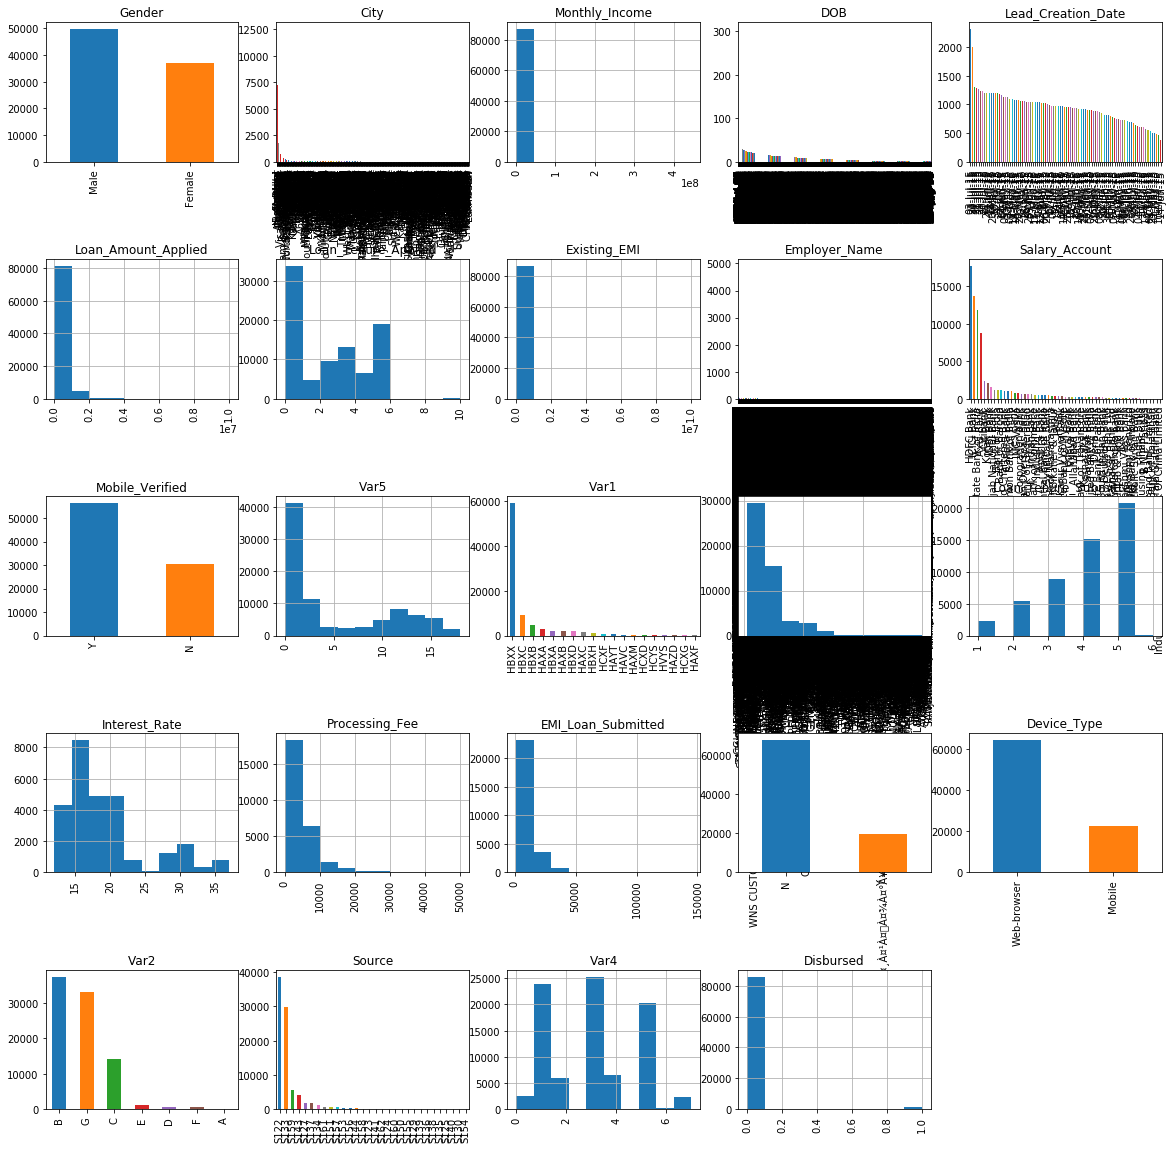

In [8]:
# Rysowanie poszczególnych zmiennych 
import numpy as np
import math
fig=plt.figure(figsize=(20,20))
cols=5
rows=math.ceil(float(data_new.shape[1])/cols)
for i, column in enumerate(data_new.columns):
    ax=fig.add_subplot(rows,cols, i+1)
    ax.set_title(column)
    if data_new.dtypes[column]==np.object:
        data_new[column].value_counts().plot(kind="bar",axes=ax)
    else:
        data_new[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [9]:
data_new.corr()

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Var4,Disbursed
Monthly_Income,1.000000,0.003050,-0.004282,0.135974,0.020243,0.036595,-0.001746,-0.014963,0.019951,0.034169,0.006089,0.000219
Loan_Amount_Applied,0.003050,1.000000,0.502259,0.064065,0.320854,0.413282,0.138644,-0.179344,0.189698,0.245000,-0.002743,0.032846
Loan_Tenure_Applied,-0.004282,0.502259,1.000000,0.054314,0.240422,-0.038525,0.138085,-0.138171,-0.113117,-0.195484,-0.108432,0.037109
Existing_EMI,0.135974,0.064065,0.054314,1.000000,0.016414,0.011700,0.000468,-0.016446,-0.002936,0.008085,-0.031013,0.015621
Var5,0.020243,0.320854,0.240422,0.016414,1.000000,0.294662,-0.084105,-0.539847,0.203371,0.276745,0.357712,0.117146
Loan_Amount_Submitted,0.036595,0.413282,-0.038525,0.011700,0.294662,1.000000,0.381091,-0.320479,0.764074,0.915282,-0.045967,0.043124
Loan_Tenure_Submitted,-0.001746,0.138644,0.138085,0.000468,-0.084105,0.381091,1.000000,-0.094365,0.306699,0.091181,0.031854,-0.001593
Interest_Rate,-0.014963,-0.179344,-0.138171,-0.016446,-0.539847,-0.320479,-0.094365,1.000000,-0.111722,-0.242168,0.057337,-0.092410
Processing_Fee,0.019951,0.189698,-0.113117,-0.002936,0.203371,0.764074,0.306699,-0.111722,1.000000,0.721399,0.097977,0.033229
EMI_Loan_Submitted,0.034169,0.245000,-0.195484,0.008085,0.276745,0.915282,0.091181,-0.242168,0.721399,1.000000,0.114507,0.049190


In [10]:
## Nie ma sensu dla wszystkich danych - tylko dla danych numerycznych nie kategorycznych - data_new.describe

In [11]:
data_new['Monthly_Income'].describe().round()

count        87020.0
mean         58850.0
std        2177511.0
min              0.0
25%          16500.0
50%          25000.0
75%          40000.0
max      444554443.0
Name: Monthly_Income, dtype: float64

### Czyszczenie danych - zmiana danych tekstowych na numeryczne

In [12]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 24 columns):
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null float64
Filled_Form              87020 non-null

### GENDER

In [13]:
data_new['Gender'].value_counts()

Male      49848
Female    37172
Name: Gender, dtype: int64

In [14]:
data_new['Gender'] = data_new['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [15]:
data_new['Gender'].value_counts()

1    49848
0    37172
Name: Gender, dtype: int64

### DEVICE TYPE

In [16]:
data_new['Device_Type'].value_counts()

Web-browser    64316
Mobile         22704
Name: Device_Type, dtype: int64

In [17]:
data_new['Device_Type'] = data_new['Device_Type'].map( {'Mobile': 0, 'Web-browser': 1} ).astype(int)

In [18]:
data_new['Device_Type'].value_counts()

1    64316
0    22704
Name: Device_Type, dtype: int64

### MOBILE VERIFIED

In [19]:
data_new['Mobile_Verified'].value_counts()

Y    56481
N    30539
Name: Mobile_Verified, dtype: int64

In [20]:
data_new['Mobile_Verified'] = data_new['Mobile_Verified'].map( {'N': 0, 'Y': 1} ).astype(int)

In [21]:
data_new['Mobile_Verified'].value_counts()

1    56481
0    30539
Name: Mobile_Verified, dtype: int64

### FILLED_FORM

In [22]:
data_new['Filled_Form'].value_counts()

N    67530
Y    19490
Name: Filled_Form, dtype: int64

In [23]:
data_new['Filled_Form'] = data_new['Filled_Form'].map( {'N': 0, 'Y': 1} ).astype(int)

In [24]:
data_new['Filled_Form'].value_counts()

0    67530
1    19490
Name: Filled_Form, dtype: int64

### Wiek w dniach na podstawie daty urodzenia i daty złożenia wniosku


### DOB

In [25]:
data_new['DOB'].describe()

count         87020
unique        11345
top       11-Nov-80
freq            306
Name: DOB, dtype: object

In [26]:
# Próba prostego przekształcenia kolumny DOB na datę

In [27]:
DOB_new = pd.to_datetime(data_new['DOB'])
print('min DOB', DOB_new.min())
print('max DOB', DOB_new.max())

min DOB 1969-01-01 00:00:00
max DOB 2068-12-29 00:00:00


In [28]:
# Korekcja danych w kolumnie DOB z uwzględnieniem świata realnego - [ Data urodzenia w przyszłość ]

In [29]:
data_new['DOB_new'] = ['-'.join([item.split('-')[0],item.split('-')[1],'19' + item.split('-')[2]]) for item in data['DOB']]

In [30]:
data_new['DOB_new'] = pd.to_datetime(data_new['DOB_new'])

In [31]:
print('min DOB', data_new['DOB_new'].min())
print('max DOB', data_new['DOB_new'].max())

min DOB 1915-06-20 00:00:00
max DOB 1997-12-25 00:00:00


### Lead_Creation_Date

In [32]:
data_new['Lead_Creation_Date_new'] = pd.to_datetime(data_new['Lead_Creation_Date'])

### Age in Days

In [33]:
# Wiek na dzień zawarcia pożyczki -> Poprawna data zawarcia pożyczki - poprawna data urodzenia.
data_new['Age_In_Days'] = (data_new['Lead_Creation_Date_new']-data_new['DOB_new']).astype('timedelta64[D]')

# Deklaracja stałych 
### Wartości progowe poniżej których dane kodujemy jako 'OTHER', 

In [34]:
TRESHOLD = 1
SALARY_ACCOUNT_TRESHOLD = 0.75
CITY_TRESHOLD = 20
EMPLOYER_NAME_TRESHOLD = 30
SOURCE_TRESHOLD = 1000

### VAR1

In [35]:
data_new['Var1'].unique()

array(['HBXX', 'HBXA', 'HAXM', 'HAXB', 'HBXC', 'HBXD', 'HBXH', 'HAXA',
       'HBXB', 'HAYT', 'HCXD', 'HVYS', 'HAVC', 'HCXG', 'HAZD', 'HCYS',
       'HCXF', 'HAXC', 'HAXF'], dtype=object)

In [36]:
map_var1 = dict()
for _, item in enumerate(data_new.Var1.value_counts()):
    if 100 * (item / data_new.shape[0]) < TRESHOLD:
        key = data_new.Var1.value_counts().index[_]
        map_var1[key] = 'OTHER'

In [37]:
data_new.Var1.replace(to_replace=map_var1, inplace=True)

Text(0.5, 0, 'Var1')

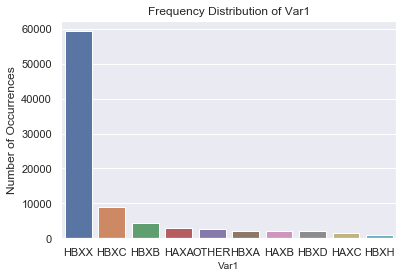

In [38]:
Var1 = data_new['Var1'].value_counts()
sns.set(style="darkgrid")
ax = sns.barplot(Var1.index, Var1.values)
#ax.set_xticks([])
plt.title('Frequency Distribution of Var1')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Var1', fontsize=10)

### VAR2

In [39]:
map_var2 = dict()
for _, item in enumerate(data_new.Var2.value_counts()):
    if 100 * (item / data_new.shape[0]) < TRESHOLD:
        key = data_new.Var2.value_counts().index[_]
        map_var2[key] = 'OTHER'

In [40]:
data_new.Var2.replace(to_replace=map_var2, inplace=True)

Text(0.5, 0, 'Var2')

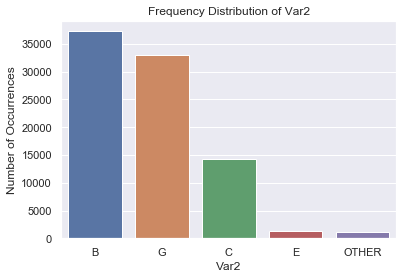

In [41]:
Var2 = data_new['Var2'].value_counts()
sns.set(style="darkgrid")
ax = sns.barplot(Var2.index, Var2.values)
#ax.set_xticks([])
plt.title('Frequency Distribution of Var2')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Var2', fontsize=12)

### SALARY_ACCOUNT

In [46]:
suma = 0
for _, item in enumerate(data_new.Salary_Account.value_counts()):
    suma += item / data_new.shape[0]
    print(_, data_new.Salary_Account.value_counts().index[_], ':' , item, ':',100 * (item / data_new.shape[0]))
    if _ > 15 :
        break

0 HDFC Bank : 17695 : 20.334405883704896
1 ICICI Bank : 13636 : 15.669960928522178
2 State Bank of India : 11843 : 13.609515054010574
3 OTHER : 9416 : 10.820501034245002
4 Axis Bank : 8783 : 10.093082050103424
5 Citibank : 2376 : 2.7304068030337856
6 Kotak Bank : 2067 : 2.375316019305907
7 IDBI Bank : 1550 : 1.7811997242013329
8 Punjab National Bank : 1201 : 1.3801424959779363
9 Bank of India : 1170 : 1.3445185014939096
10 Bank of Baroda : 1126 : 1.2939554125488393
11 Standard Chartered Bank : 995 : 1.143415306826017
12 Canara Bank : 990 : 1.1376695012640774
13 Union Bank of India : 951 : 1.0928522178809468
14 Yes Bank : 779 : 0.8951965065502183
15 ING Vysya : 678 : 0.7791312341990347


In [47]:
map_Salary_Account = dict()
for _, item in enumerate(data_new.Salary_Account.value_counts()):
    if 100 * (item / data_new.shape[0]) < SALARY_ACCOUNT_TRESHOLD:
        key = data_new.Salary_Account.value_counts().index[_]
        map_Salary_Account[key] = 'OTHER'

In [48]:
data_new.Salary_Account.replace(to_replace=map_Salary_Account, inplace=True)

### Salary_Account - braki
Wypłata do ręki dlatego nie mogę usunąć uzupełniam wartością "None"

In [49]:
data_new['Salary_Account'].fillna('None',inplace=True)

In [50]:
data_new['Salary_Account'].value_counts()

HDFC Bank                  17695
ICICI Bank                 13636
State Bank of India        11843
None                       11764
OTHER                       9416
Axis Bank                   8783
Citibank                    2376
Kotak Bank                  2067
IDBI Bank                   1550
Punjab National Bank        1201
Bank of India               1170
Bank of Baroda              1126
Standard Chartered Bank      995
Canara Bank                  990
Union Bank of India          951
Yes Bank                     779
ING Vysya                    678
Name: Salary_Account, dtype: int64

Text(0.5, 0, 'Salary_Account')

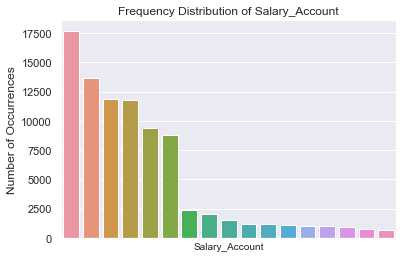

In [51]:
Salary_Account = data_new['Salary_Account'].value_counts()
sns.set(style="darkgrid")
ax = sns.barplot(Salary_Account.index, Salary_Account.values)
ax.set_xticks([])
plt.title('Frequency Distribution of Salary_Account')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Salary_Account', fontsize=10)

In [52]:
data_new['Salary_Account'].unique()

array(['HDFC Bank', 'ICICI Bank', 'State Bank of India', 'OTHER',
       'Yes Bank', 'None', 'Kotak Bank', 'Axis Bank',
       'Standard Chartered Bank', 'Bank of India', 'Citibank',
       'Punjab National Bank', 'Bank of Baroda', 'Canara Bank',
       'IDBI Bank', 'Union Bank of India', 'ING Vysya'], dtype=object)

### CITY

In [53]:
suma = 0
for _, item in enumerate(data_new.City.value_counts()):
    suma += item / data_new.shape[0]
    if _ > CITY_TRESHOLD:
        break

In [54]:
map_city = dict()
for _, item in enumerate(data_new.City.value_counts()):
    if 100 * (item / data_new.shape[0]) < TRESHOLD:
        key = data_new.City.value_counts().index[_]
        map_city[key] = 'OTHER'

In [55]:
data_new.City.replace(to_replace=map_city, inplace=True)

In [56]:
data_new['City'].fillna('OTHER',inplace=True)

In [57]:
data_new.City.value_counts()

OTHER         24208
Delhi         12527
Bengaluru     10824
Mumbai        10795
Hyderabad      7272
Chennai        6916
Pune           5207
Kolkata        2888
Ahmedabad      1788
Jaipur         1331
Gurgaon        1212
Coimbatore     1147
Thane           905
Name: City, dtype: int64

Text(0.5, 0, 'City')

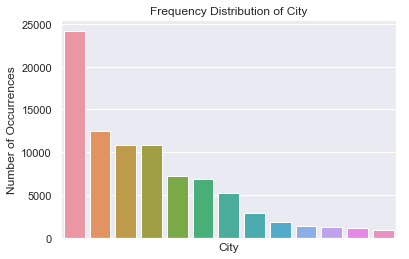

In [58]:
City = data_new['City'].value_counts()
sns.set(style="darkgrid")
ax = sns.barplot(City.index, City.values)
ax.set_xticks([])
plt.title('Frequency Distribution of City')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('City', fontsize=12)

### EMPLOYER NAME

In [59]:
data_new.Employer_Name.value_counts()

0                                               4914
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       324
GOOGLE                                           301
HCL TECHNOLOGIES LTD                             250
ICICI BANK LTD                                   239
INDIAN AIR FORCE                                 191
INFOSYS TECHNOLOGIES                             181
GENPACT                                          179
IBM CORPORATION                                  173
INDIAN ARMY                                      171
TYPE SLOWLY FOR AUTO FILL                        162
WIPRO TECHNOLOGIES                               155
HDFC BANK LTD                                    148
IKYA HUMAN CAPITAL SOLUTIONS LTD                 142
STATE GOVERNMENT                                 134
INDIAN RAILWAY                                   130
INDIAN NAVY                                   

##### Uzupełniam braki w kolumnie wartością "0"

In [60]:
data_new['Employer_Name'].fillna('0',inplace=True)

##### Braki w kolumnie, wartości "OTHERS", "Type i podobne" zastępuję jedną wspólną wartością "OTHER"

In [61]:
others_emp = ['TYPE SLOWLY FOR AUTO FILL', '0', 'OTHERS']
data_new.loc[data_new['Employer_Name'].isin(others_emp), 'Employer_Name'] = 'OTHER'

##### Uwzględniam pracodawców różnie wpisanych np. (IBM, TATA)

In [62]:
data_new.loc[data_new['Employer_Name'].str.contains('IBM'), 'Employer_Name'] = 'IBM'
data_new.loc[data_new['Employer_Name'].str.contains('TATA'), 'Employer_Name'] = 'TATA CAPITAL GROUP'

##### Do analizy biorę tylko firmy , których pracownicy najczęściej otrzymują pożyczk.
Liczba pracowaców : EMPLOYER_NAME_TRESHOLD

In [63]:
emp_importance = data_new.groupby('Employer_Name')['Disbursed'].sum().sort_values(ascending=False)
emp_important = list(emp_importance[:EMPLOYER_NAME_TRESHOLD].index)

In [66]:
emp_important

['TATA CAPITAL GROUP',
 'OTHER',
 'IBM',
 'ACCENTURE SERVICES PVT LTD',
 'COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD',
 'GENPACT',
 'HCL TECHNOLOGIES LTD',
 'INDIAN RAILWAY',
 'TCS AND ASSOCIATES PVT LTD',
 'CIPLA LTD',
 'HCL AVITAS PVT LTD',
 'HCL - HEWLETT-PACKARD LTD',
 'DR REDDYS LABORATORIES LTD',
 'BSNL',
 'HSBC ELECTRONIC DATA PROCESSING INDIA PVT LTD',
 'CAPGEMINI INDIA PVT LTD',
 'IDEA CELLULAR LTD',
 'KOTAK MAHINDRA BANK LTD',
 'ERICSSON INDIA GLOBAL SERVICES PVT LTD',
 'ADP INDIA PVT LTD',
 'IKYA HUMAN CAPITAL SOLUTIONS LTD',
 'L&T INFOTECH LTD',
 'COMPUTER SCIENCES CORPORATION INDIA PVT LTD (CSC) ',
 'HDFC BANK LTD',
 'MINDTREE LTD',
 'NOKIA NETWORKS INDIA PVT LTD',
 'ABC AND SONS LTD',
 'TECH MAHINDRA LTD',
 'KPMG',
 'AMAZON DEVELOPMENT CENTER INDIA PVT LTD']

In [67]:
data_new.loc[ ~data_new['Employer_Name'].isin(emp_important), 'Employer_Name'] = 'emp_no_important'

In [68]:
data_new.Employer_Name.value_counts()

emp_no_important                                      77517
OTHER                                                  5266
TATA CAPITAL GROUP                                     1158
IBM                                                     484
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD            404
ACCENTURE SERVICES PVT LTD                              324
HCL TECHNOLOGIES LTD                                    250
GENPACT                                                 179
HDFC BANK LTD                                           148
IKYA HUMAN CAPITAL SOLUTIONS LTD                        142
INDIAN RAILWAY                                          130
TECH MAHINDRA LTD                                       113
CAPGEMINI INDIA PVT LTD                                  96
CIPLA LTD                                                90
HSBC ELECTRONIC DATA PROCESSING INDIA PVT LTD            78
KOTAK MAHINDRA BANK LTD                                  76
TCS AND ASSOCIATES PVT LTD              

In [69]:
### Dodatkowo można by dodać mapowanie Employer_Name jako INT w założeniu że najpopularnijeszy ma największą wartość

Text(0.5, 0, 'Employer')

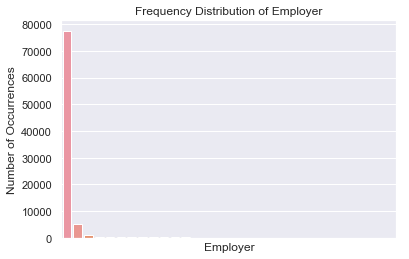

In [70]:
Employer = data_new['Employer_Name'].value_counts()
sns.set(style="darkgrid")
ax = sns.barplot(Employer.index, Employer.values)
ax.set_xticks([])

plt.title('Frequency Distribution of Employer')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Employer', fontsize=12)


In [71]:
Employer.index

Index(['emp_no_important', 'OTHER', 'TATA CAPITAL GROUP', 'IBM',
       'COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD',
       'ACCENTURE SERVICES PVT LTD', 'HCL TECHNOLOGIES LTD', 'GENPACT',
       'HDFC BANK LTD', 'IKYA HUMAN CAPITAL SOLUTIONS LTD', 'INDIAN RAILWAY',
       'TECH MAHINDRA LTD', 'CAPGEMINI INDIA PVT LTD', 'CIPLA LTD',
       'HSBC ELECTRONIC DATA PROCESSING INDIA PVT LTD',
       'KOTAK MAHINDRA BANK LTD', 'TCS AND ASSOCIATES PVT LTD',
       'ERICSSON INDIA GLOBAL SERVICES PVT LTD', 'DR REDDYS LABORATORIES LTD',
       'BSNL', 'IDEA CELLULAR LTD', 'AMAZON DEVELOPMENT CENTER INDIA PVT LTD',
       'COMPUTER SCIENCES CORPORATION INDIA PVT LTD (CSC) ',
       'ADP INDIA PVT LTD', 'MINDTREE LTD', 'NOKIA NETWORKS INDIA PVT LTD',
       'HCL - HEWLETT-PACKARD LTD', 'KPMG', 'ABC AND SONS LTD',
       'HCL AVITAS PVT LTD', 'L&T INFOTECH LTD'],
      dtype='object')

### SOURCE

In [72]:
data_new['Source'].unique()

array(['S122', 'S143', 'S134', 'S133', 'S159', 'S151', 'S137', 'S127',
       'S144', 'S123', 'S156', 'S153', 'S124', 'S161', 'S139', 'S154',
       'S157', 'S138', 'S162', 'S141', 'S158', 'S125', 'S129', 'S136',
       'S130', 'S155', 'S160', 'S150', 'S135', 'S140'], dtype=object)

In [73]:
data_new['Source'].value_counts()

S122    38567
S133    29885
S159     5599
S143     4332
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      650
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S129        3
S139        3
S136        3
S138        3
S135        2
S125        1
S140        1
S130        1
S154        1
Name: Source, dtype: int64

In [74]:
map_Source = dict()
for _, item in enumerate(data_new.Source.value_counts()):
    if item < SOURCE_TRESHOLD:
        key = data_new.Source.value_counts().index[_]
        map_Source [key] = 'OTHER'

In [75]:
data_new.Source.replace(to_replace=map_Source, inplace=True)

In [76]:
data_new['Source'].value_counts()

S122     38567
S133     29885
S159      5599
S143      4332
OTHER     3681
S127      1931
S137      1724
S134      1301
Name: Source, dtype: int64

Text(0.5, 0, 'Source')

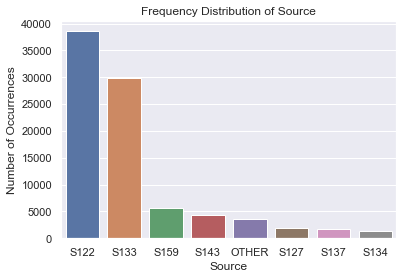

In [77]:
Source = data_new['Source'].value_counts()
sns.set(style="darkgrid")
ax = sns.barplot(Source.index, Source.values)
#ax.set_xticks([])
plt.title('Frequency Distribution of Source')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Source', fontsize=12)

In [78]:
null_counts = data_new.isnull().sum()
print("Liczba pustych wartości w każdej z kolumn :\n{}".format(null_counts))

Liczba pustych wartości w każdej z kolumn :
Gender                        0
City                          0
Monthly_Income                0
DOB                           0
Lead_Creation_Date            0
Loan_Amount_Applied          71
Loan_Tenure_Applied          71
Existing_EMI                 71
Employer_Name                 0
Salary_Account                0
Mobile_Verified               0
Var5                          0
Var1                          0
Loan_Amount_Submitted     34613
Loan_Tenure_Submitted     34613
Interest_Rate             59294
Processing_Fee            59600
EMI_Loan_Submitted        59294
Filled_Form                   0
Device_Type                   0
Var2                          0
Source                        0
Var4                          0
Disbursed                     0
DOB_new                       0
Lead_Creation_Date_new        0
Age_In_Days                   0
dtype: int64


#### Kolumny gdzie liczba wartości pustych jest niewielka wypełniamy średnią

In [79]:
data_new['Loan_Amount_Applied'] = data_new['Loan_Amount_Applied'].fillna(data_new['Loan_Amount_Applied'].mean())
data_new['Loan_Tenure_Applied'] = data_new['Loan_Tenure_Applied'].fillna(data_new['Loan_Tenure_Applied'].mean())
data_new['Existing_EMI'] = data_new['Existing_EMI'].fillna(data_new['Existing_EMI'].mean())

### Usuniecie kolumn tymczasowych, z dużymi brakami danych i niskiej korelacji

In [80]:
# Na przykładzie koleracji 'Interest_Rate' i szukanej Disbursed
data_new['Interest_Rate'].value_counts()

20.00    4707
14.85    2016
13.99    1699
31.50    1696
15.25    1553
16.75    1518
18.25    1312
15.50    1292
28.50     950
18.40     800
13.00     660
24.00     649
19.00     625
15.75     557
13.50     521
18.15     506
35.50     493
18.00     474
17.00     416
16.25     370
17.50     359
18.50     315
37.00     302
14.49     292
13.49     275
14.25     262
13.75     255
14.50     229
16.00     217
32.50     212
         ... 
25.50      65
16.20      65
15.35      57
31.00      56
29.00      46
14.80      37
16.15      31
29.50      26
27.50      26
14.99      22
21.50      21
19.05      18
26.50      16
23.00      15
30.50      13
15.10      12
24.50      11
15.80       7
14.90       7
14.30       6
28.00       6
15.70       6
15.99       5
14.00       4
15.49       3
14.55       2
20.50       2
15.60       1
14.29       1
15.15       1
Name: Interest_Rate, Length: 73, dtype: int64

In [81]:
data_new[['Interest_Rate','Disbursed']].corr()

,Interest_Rate,Disbursed
Interest_Rate,1.00000,-0.09241
Disbursed,-0.09241,1.00000


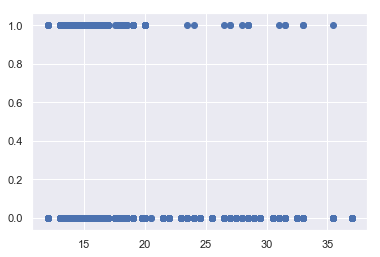

In [82]:
plt.scatter(data_new[['Interest_Rate']],data_new[['Disbursed']])

In [83]:
data_new = data_new.drop(['DOB','Lead_Creation_Date','DOB_new','Lead_Creation_Date_new','Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted'], axis=1)

In [84]:
data_new.columns

Index(['Gender', 'City', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Employer_Name',
       'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1', 'Filled_Form',
       'Device_Type', 'Var2', 'Source', 'Var4', 'Disbursed', 'Age_In_Days'],
      dtype='object')

In [85]:
# Sprawdzenie ile kolumn zostało po usunięciu powyższych
data_new.shape

(87020, 18)

In [86]:
null_counts = data_new.isnull().sum()
print("Liczba pustych wartości w każdej z kolumn :\n{}".format(null_counts))

Liczba pustych wartości w każdej z kolumn :
Gender                 0
City                   0
Monthly_Income         0
Loan_Amount_Applied    0
Loan_Tenure_Applied    0
Existing_EMI           0
Employer_Name          0
Salary_Account         0
Mobile_Verified        0
Var5                   0
Var1                   0
Filled_Form            0
Device_Type            0
Var2                   0
Source                 0
Var4                   0
Disbursed              0
Age_In_Days            0
dtype: int64


###  Przygotowanie nowegych DataFrame do modelowania
Kolumny z kategoriami enkoduje wartościami numerycznymi

In [88]:
data_target_dummies = pd.get_dummies(data_new, drop_first=True)

In [89]:
data_target_dummies.columns

Index(['Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Mobile_Verified', 'Var5',
       'Filled_Form', 'Device_Type', 'Var4', 'Disbursed', 'Age_In_Days',
       'City_Bengaluru', 'City_Chennai', 'City_Coimbatore', 'City_Delhi',
       'City_Gurgaon', 'City_Hyderabad', 'City_Jaipur', 'City_Kolkata',
       'City_Mumbai', 'City_OTHER', 'City_Pune', 'City_Thane',
       'Employer_Name_ACCENTURE SERVICES PVT LTD',
       'Employer_Name_ADP INDIA PVT LTD',
       'Employer_Name_AMAZON DEVELOPMENT CENTER INDIA PVT LTD',
       'Employer_Name_BSNL', 'Employer_Name_CAPGEMINI INDIA PVT LTD',
       'Employer_Name_CIPLA LTD',
       'Employer_Name_COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD',
       'Employer_Name_COMPUTER SCIENCES CORPORATION INDIA PVT LTD (CSC) ',
       'Employer_Name_DR REDDYS LABORATORIES LTD',
       'Employer_Name_ERICSSON INDIA GLOBAL SERVICES PVT LTD',
       'Employer_Name_GENPACT', 'Employer_Name_HCL - HEWLETT-PACKARD

In [90]:
data_target_dummies.shape

(87020, 90)

### LabelEncoder

In [91]:
## Zastapienie kolumn typu obiekt na dane numeryczne
import sklearn.preprocessing as preprocessing
data_target_le = data_new.copy()
encoders={}
for column in data_target_le.columns:
    if data_target_le.dtypes[column]==np.object:
        encoders[column]=preprocessing.LabelEncoder()
        data_target_le[column]=encoders[column].fit_transform(data_target_le[column])

In [92]:
data_target_le.columns

Index(['Gender', 'City', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Employer_Name',
       'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1', 'Filled_Form',
       'Device_Type', 'Var2', 'Source', 'Var4', 'Disbursed', 'Age_In_Days'],
      dtype='object')

In [93]:
data_target_le.shape

(87020, 18)

In [94]:
data_target_le.head()

,Gender,City,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Age_In_Days
0,0,4,20000,300000.0,5.0,0.0,30,5,0,0,8,0,1,3,1,1,0,13506.0
1,1,9,35000,200000.0,2.0,0.0,27,6,1,13,3,0,1,3,1,3,0,10801.0
2,1,10,22500,600000.0,4.0,0.0,30,14,1,0,8,0,1,0,6,1,0,12274.0
3,1,10,35000,1000000.0,5.0,0.0,30,14,1,10,8,0,1,0,6,3,0,10022.0
4,1,1,100000,500000.0,2.0,25000.0,30,5,1,17,8,0,1,0,4,3,0,11415.0


### Modelowanie

Podział na X, y oraz zbiór treningowy i testowy

Dane zakodowane : 
get_dummiec potem
LabelEncoderem

In [95]:
y = data_target_dummies['Disbursed']
X = data_target_dummies.drop(['Disbursed'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Istotnym elementem w procesie modelowania prócz przygotowania danych, doboru modelu jest wybór miary oceny jakości modelu. W przypadu niezbalansowanych danych, miara accuracy nie przedstawia rzeczywistej jakości modelu. W rozważaniu przedstawię dwie metody preprocessingu oraz 'undersampling' oraz 'oversamplig' dla prób niezbalansowanych.


#### Pierwszy model bazowy - Regresja logistyczna

In [96]:
pipe = Pipeline([("model",LogisticRegression())])
pipe.fit(X_train, y_train)
#accuracy_score(pipe.predict(X_test), y_test)
print('Accuracy test:', accuracy_score(y_test, pipe.predict(X_test)))
print('AUC Score test:', roc_auc_score(y_test, pipe.predict(X_test)))
print('Suma predykcji:', pipe.predict(X_test).sum())
print('F1 score train = ', f1_score(y_train,pipe.predict(X_train)))
print('F1 score test', f1_score(y_test,pipe.predict(X_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy test: 0.984869378686892
AUC Score test: 0.49998055382700685
Suma predykcji: 1
F1 score train =  0.0
F1 score test 0.0


#### Miara accuracy_score jest bardzo wysoka, gdyż model przewiduje same 0 
#### Typowo niezbalansowane klasy !

In [97]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Drugi model bazowy - Regresja logistyczna z użyciem Skalera.

In [98]:
pipe = Pipeline([("standarization",MinMaxScaler()),("model",LogisticRegression())])
pipe.fit(X_train, y_train)
print('Accuracy test:', accuracy_score(y_test,pipe.predict(X_test)))
print('AUC Score test:', roc_auc_score(y_test,pipe.predict(X_test)))
print('Suma predykcji:', pipe.predict(X_test).sum())
print('F1 score test', f1_score(y_test,pipe.predict(X_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy test: 0.984869378686892
AUC Score test: 0.49998055382700685
Suma predykcji: 1
F1 score test 0.0


### Rozwiązanie problemu niezbalansowanej próby

count_class_0:  85747 , count_class_1:  1273


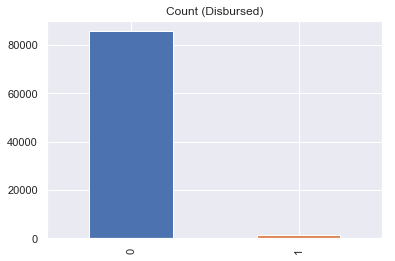

In [99]:
data_target = data_target_dummies.copy()

count_class_0, count_class_1 = data_target['Disbursed'].value_counts()
data_target_class_0=data_target[data_target["Disbursed"]==0]
data_target_class_1=data_target[data_target["Disbursed"]==1]

data_target['Disbursed'].value_counts().plot(kind='bar', title='Count (Disbursed)')
print('count_class_0: ', count_class_0, ', count_class_1: ', count_class_1)

count_class_0:  60035 , count_class_1:  879


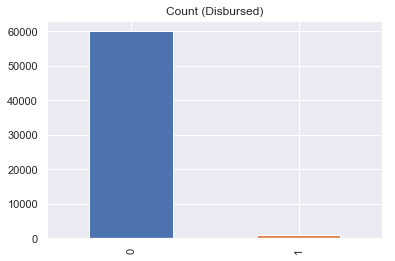

In [100]:
X_concat = pd.concat([X_train, y_train], axis=1)

count_class_0, count_class_1 = X_concat['Disbursed'].value_counts()
print('count_class_0: ', count_class_0, ', count_class_1: ', count_class_1)
data_target_class_0=X_concat[X_concat['Disbursed']==0]
data_target_class_1=X_concat[X_concat['Disbursed']==1]
X_concat['Disbursed'].value_counts().plot(kind='bar', title='Count (Disbursed)')

### UNDERsamplig

1    879
0    879
Name: Disbursed, dtype: int64


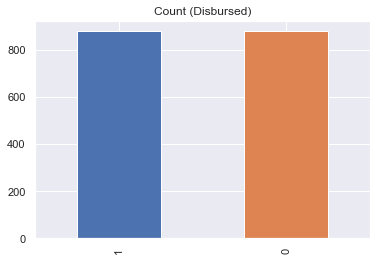

In [101]:
data_target_class_0_under=data_target_class_0.sample(count_class_1)
data_target_under = pd.concat([data_target_class_0_under,data_target_class_1],axis=0)
print(data_target_under['Disbursed'].value_counts())
data_target_under['Disbursed'].value_counts().plot(kind='bar', title='Count (Disbursed)')
plt.show()

In [102]:
X_train_under = data_target_under.drop(["Disbursed"], axis = 1)
y_train_under = data_target_under.Disbursed

In [108]:
#wybor_modelu(X_train_under, y_train_under, X_test, y_test, names, models, parameters, "roc_auc")
# Uruchomione poniżej

### OVERsamplig

1    60035
0    60035
Name: Disbursed, dtype: int64


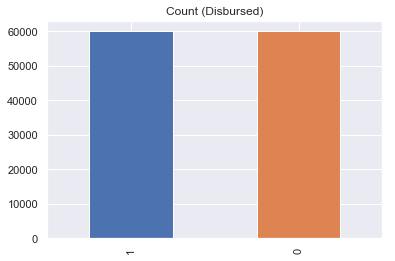

In [107]:
data_target_class_1_over=data_target_class_1.sample(count_class_0,replace=True) # ze zwracaniem, ponieważ nie mamy tyle danych
data_target_over = pd.concat([data_target_class_0,data_target_class_1_over],axis=0)
print(data_target_over['Disbursed'].value_counts())
data_target_over['Disbursed'].value_counts().plot(kind='bar', title='Count (Disbursed)')

In [109]:
X_train_over = data_target_over.drop(["Disbursed"], axis = 1)
y_train_over = data_target_over.Disbursed

In [111]:
#wybor_modelu(X_train_over, y_train_over, X_test, y_test, names, models, parameters, "roc_auc")
# Uruchomione poniżej

## Zdefiniowanie modeli, ich możliwe parametry do fitowania

### Definicja parametrów dla modelu

In [104]:
names = ["Regresja logistyczna", 
         "Drzewo decyzyjne", 
         "Naiwny Bayes", 
         "RandomForest"
        ]

models = [
    [("scaler", MaxAbsScaler()), ("model", LogisticRegression())],
    [("model", DecisionTreeClassifier())],
    [("model", MultinomialNB())],
    [("model", RandomForestClassifier(n_jobs=-1))]
]

models_run = [
    True, #LR
    True, #DTC
    True, #MNB
    True  #RF
]


parameters = [
    {"model__C": [0.01, 1, 10, 100], "model__penalty": ["l1","l2"]}, 
    {"model__criterion":["gini","entropy"]},
    {},
    {"model__n_estimators": [10, 100, 100], "model__max_depth": [10, 100, 1000], "model__min_samples_split": [2,4,8]}
]

if len(names) != len(models) or len(models) != len(parameters) or len(models) != len(models_run):
    raise ValueError("Listy wejściowe nie są równej długości!", len(names), len(models), len(parameters) , len(models_run))


In [105]:
def wybor_modelu(X_train, y_train, X_test, y_test, names, models, parameters, scoring_p):
    best_names = []
    best_models = []
    best_params = []
    acc_test_tbl = []
    auc_test_tbl = []
    f1_test_tbl = []
    
    if len(names) != len(models) or len(models) != len(parameters):
        raise ValueError("Listy wejściowe nie są równej długości!", len(names), len(models), len(parameters))
    
    for name, model, parameter in zip(names, models, parameters):
        print("Fituję : ", name)
        pipe = Pipeline(model)
        gs = GridSearchCV(pipe, parameter, cv=10, scoring=scoring_p, n_jobs=-1)
        gs.fit(X_train, y_train)
    
        for mean, std, params in zip(gs.cv_results_["mean_test_score"], gs.cv_results_["std_test_score"], gs.cv_results_["params"]):
            print("mean: ", mean, ", std: ", std, params)
    
        best_names.append(name)
        best_models.append(gs.best_estimator_)
        best_params.append(gs.best_params_)        
    
    print()
    print("Wyniki na testowym:")
    for name, best_model, best_param in zip(best_names, best_models, best_params):
        acc_test_score = accuracy_score(y_test, best_model.predict(X_test))
        auc_test_score = roc_auc_score(y_test, best_model.predict(X_test))
        f1_test_score = f1_score(y_test, best_model.predict(X_test))
        print(name, " (", best_param, "):", acc_test_score, " :", auc_test_score, " :", f1_test_score)
        acc_test_tbl.append(acc_test_score)
        auc_test_tbl.append(auc_test_score)
        f1_test_tbl.append(f1_test_score)
    
    compare_dict = {'Method': best_names,
         'Accuracy Score Test': acc_test_tbl,
         'AUC Score test': auc_test_tbl,
         'F1 Score test': f1_test_tbl           
    }
    compare_df = pd.DataFrame(compare_dict)
    display(compare_df)

### Uruchomienie modelowania na danych get_dummies _undersampling

In [112]:
wybor_modelu(X_train_under, y_train_under, X_test, y_test, names, models, parameters, "roc_auc")

Fituję :  Regresja logistyczna


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


mean:  0.7513957689166587 , std:  0.03290097924035942 {'model__C': 0.01, 'model__penalty': 'l1'}
mean:  0.7706252236380516 , std:  0.025069433249991925 {'model__C': 0.01, 'model__penalty': 'l2'}
mean:  0.822834529834059 , std:  0.026792391151122297 {'model__C': 1, 'model__penalty': 'l1'}
mean:  0.814091693681549 , std:  0.026946551272102277 {'model__C': 1, 'model__penalty': 'l2'}
mean:  0.818966706015076 , std:  0.028507349776553597 {'model__C': 10, 'model__penalty': 'l1'}
mean:  0.8171906781121799 , std:  0.027550941625340063 {'model__C': 10, 'model__penalty': 'l2'}
mean:  0.8161979034787085 , std:  0.028305929213816642 {'model__C': 100, 'model__penalty': 'l1'}
mean:  0.8166505290637338 , std:  0.028427425102998113 {'model__C': 100, 'model__penalty': 'l2'}
Fituję :  Drzewo decyzyjne
mean:  0.6825938566552902 , std:  0.02014439940331864 {'model__criterion': 'gini'}
mean:  0.6814562002275313 , std:  0.032598979182754624 {'model__criterion': 'entropy'}
Fituję :  Naiwny Bayes
mean:  0.628

,Method,Accuracy Score Test,AUC Score test,F1 Score test
0,Regresja logistyczna,0.745920,0.743555,0.080920
1,Drzewo decyzyjne,0.692791,0.696590,0.064396
2,Naiwny Bayes,0.709186,0.619941,0.051948
3,RandomForest,0.691872,0.752355,0.073912


### Uruchomienie modelowania na danych get_dummies _oversamplig

In [113]:
wybor_modelu(X_train_over, y_train_over, X_test, y_test, names, models, parameters, "roc_auc")

Fituję :  Regresja logistyczna


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


mean:  0.8234297072080344 , std:  0.005466312058613042 {'model__C': 0.01, 'model__penalty': 'l1'}
mean:  0.8260906478526112 , std:  0.005075797786935296 {'model__C': 0.01, 'model__penalty': 'l2'}
mean:  0.8452276466052271 , std:  0.005110790468642454 {'model__C': 1, 'model__penalty': 'l1'}
mean:  0.832047117873976 , std:  0.005220272056690075 {'model__C': 1, 'model__penalty': 'l2'}
mean:  0.8457739335324573 , std:  0.005143699050087246 {'model__C': 10, 'model__penalty': 'l1'}
mean:  0.8358252542382527 , std:  0.0048265757303474375 {'model__C': 10, 'model__penalty': 'l2'}
mean:  0.8457674760007974 , std:  0.005142298943611609 {'model__C': 100, 'model__penalty': 'l1'}
mean:  0.8430766223646142 , std:  0.004916941901558057 {'model__C': 100, 'model__penalty': 'l2'}
Fituję :  Drzewo decyzyjne
mean:  0.9917401308287268 , std:  0.0006842970362946163 {'model__criterion': 'gini'}
mean:  0.9909193443196396 , std:  0.0007576122171513921 {'model__criterion': 'entropy'}
Fituję :  Naiwny Bayes
mean:

,Method,Accuracy Score Test,AUC Score test,F1 Score test
0,Regresja logistyczna,0.756454,0.735158,0.081214
1,Drzewo decyzyjne,0.969777,0.516061,0.045949
2,Naiwny Bayes,0.578718,0.541211,0.034755
3,RandomForest,0.984142,0.502110,0.009569


# Dodatkowa analiza z zastąpieniem get_dumies -> LabelEncoderem

count_class_0:  68611 , count_class_1:  1005


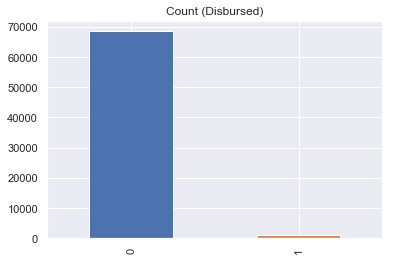

In [114]:
data_target = data_target_le.copy()
X_train, X_test, y_train, y_test = train_test_split(data_target.drop(["Disbursed"], axis = 1), data_target.Disbursed, test_size=0.2, random_state=123)

X_concat = pd.concat([X_train, y_train], axis=1)

count_class_0, count_class_1 = X_concat['Disbursed'].value_counts()
print('count_class_0: ', count_class_0, ', count_class_1: ', count_class_1)
data_target_class_0=X_concat[X_concat['Disbursed']==0]
data_target_class_1=X_concat[X_concat['Disbursed']==1]
X_concat['Disbursed'].value_counts().plot(kind='bar', title='Count (Disbursed)')

In [115]:
data_target.head()

,Gender,City,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Age_In_Days
0,0,4,20000,300000.0,5.0,0.0,30,5,0,0,8,0,1,3,1,1,0,13506.0
1,1,9,35000,200000.0,2.0,0.0,27,6,1,13,3,0,1,3,1,3,0,10801.0
2,1,10,22500,600000.0,4.0,0.0,30,14,1,0,8,0,1,0,6,1,0,12274.0
3,1,10,35000,1000000.0,5.0,0.0,30,14,1,10,8,0,1,0,6,3,0,10022.0
4,1,1,100000,500000.0,2.0,25000.0,30,5,1,17,8,0,1,0,4,3,0,11415.0


In [116]:
#Uruchomienie modelowania na danych niezbalansowanych LabelEncoder
wybor_modelu(X_train, y_train, X_test, y_test, names, models, parameters, "roc_auc")

Fituję :  Regresja logistyczna


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


mean:  0.751637619259385 , std:  0.02310875148286255 {'model__C': 0.01, 'model__penalty': 'l1'}
mean:  0.7388666234707824 , std:  0.015129360036287395 {'model__C': 0.01, 'model__penalty': 'l2'}
mean:  0.7827369093037267 , std:  0.014917063248193018 {'model__C': 1, 'model__penalty': 'l1'}
mean:  0.7827015823955106 , std:  0.015244856281379119 {'model__C': 1, 'model__penalty': 'l2'}
mean:  0.7846901399517636 , std:  0.015939066281885864 {'model__C': 10, 'model__penalty': 'l1'}
mean:  0.7831546388111111 , std:  0.014951567257043764 {'model__C': 10, 'model__penalty': 'l2'}
mean:  0.7872532679717114 , std:  0.017967750083326583 {'model__C': 100, 'model__penalty': 'l1'}
mean:  0.7834163493992742 , std:  0.014947534734257329 {'model__C': 100, 'model__penalty': 'l2'}
Fituję :  Drzewo decyzyjne
mean:  0.522548129443614 , std:  0.010606943070531777 {'model__criterion': 'gini'}
mean:  0.5230935653670732 , std:  0.013924784956630694 {'model__criterion': 'entropy'}
Fituję :  Naiwny Bayes
mean:  0.5

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForest  ( {'model__max_depth': 10, 'model__min_samples_split': 4, 'model__n_estimators': 100} ): 0.9846012410940014  : 0.5  : 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Method,Accuracy Score Test,AUC Score test,F1 Score test
0,Regresja logistyczna,0.984601,0.500000,0.000000
1,Drzewo decyzyjne,0.968858,0.523226,0.059028
2,Naiwny Bayes,0.533958,0.542955,0.035209
3,RandomForest,0.984601,0.500000,0.000000


### UNDERsamplig

1    1005
0    1005
Name: Disbursed, dtype: int64


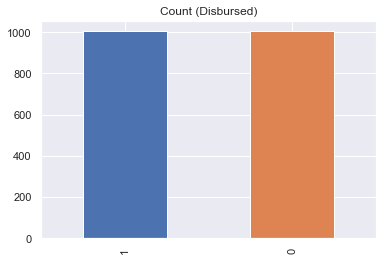

In [117]:
data_target_class_0_under=data_target_class_0.sample(count_class_1)
data_target_under = pd.concat([data_target_class_0_under,data_target_class_1],axis=0)
print(data_target_under['Disbursed'].value_counts())
data_target_under['Disbursed'].value_counts().plot(kind='bar', title='Count (Disbursed)')
plt.show()

In [119]:
X_train_under = data_target_under.drop(["Disbursed"], axis = 1)
y_train_under = data_target_under.Disbursed

In [120]:
### Uruchoemienie modelowania na danych LabelEncoder _undersampling
wybor_modelu(X_train_under, y_train_under, X_test, y_test, names, models, parameters, "roc_auc")

Fituję :  Regresja logistyczna


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


mean:  0.7472193488005516 , std:  0.04346195397548709 {'model__C': 0.01, 'model__penalty': 'l1'}
mean:  0.7551050687158268 , std:  0.03234258733081009 {'model__C': 0.01, 'model__penalty': 'l2'}
mean:  0.7999793113639722 , std:  0.03569114107137348 {'model__C': 1, 'model__penalty': 'l1'}
mean:  0.7922051130486184 , std:  0.03280801165002847 {'model__C': 1, 'model__penalty': 'l2'}
mean:  0.8023084577114429 , std:  0.0357399202593265 {'model__C': 10, 'model__penalty': 'l1'}
mean:  0.800499679818728 , std:  0.0341099960950706 {'model__C': 10, 'model__penalty': 'l2'}
mean:  0.8024567262696417 , std:  0.0359635458439828 {'model__C': 100, 'model__penalty': 'l1'}
mean:  0.8022584109157184 , std:  0.03567605404295645 {'model__C': 100, 'model__penalty': 'l2'}
Fituję :  Drzewo decyzyjne
mean:  0.6736318407960199 , std:  0.03522264423868038 {'model__criterion': 'gini'}
mean:  0.6791044776119403 , std:  0.023134415752435685 {'model__criterion': 'entropy'}
Fituję :  Naiwny Bayes
mean:  0.61957928180

,Method,Accuracy Score Test,AUC Score test,F1 Score test
0,Regresja logistyczna,0.717364,0.738936,0.076591
1,Drzewo decyzyjne,0.686164,0.699218,0.065366
2,Naiwny Bayes,0.709837,0.619415,0.052888
3,RandomForest,0.674213,0.748244,0.072317


### OVERsamplig

1    68611
0    68611
Name: Disbursed, dtype: int64


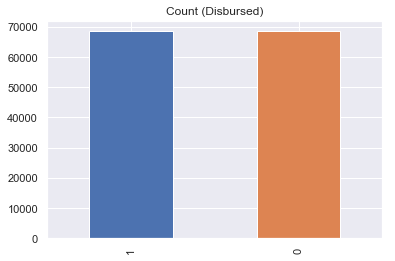

In [121]:
data_target_class_1_over=data_target_class_1.sample(count_class_0,replace=True) # ze zwracaniem, ponieważ nie mamy tyle danych
data_target_over = pd.concat([data_target_class_0,data_target_class_1_over],axis=0)
print(data_target_over['Disbursed'].value_counts())
data_target_over['Disbursed'].value_counts().plot(kind='bar', title='Count (Disbursed)')


In [122]:
X_train_over = data_target_over.drop(["Disbursed"], axis = 1)
y_train_over = data_target_over.Disbursed

In [123]:
### Uruchoemienie modelowania na danych LabelEncoder _oversamplig
wybor_modelu(X_train_over, y_train_over, X_test, y_test, names, models, parameters, "roc_auc")

Fituję :  Regresja logistyczna


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


mean:  0.7871737759628653 , std:  0.0030253887368449635 {'model__C': 0.01, 'model__penalty': 'l1'}
mean:  0.7865462142033933 , std:  0.0030554074698025827 {'model__C': 0.01, 'model__penalty': 'l2'}
mean:  0.8096887001226203 , std:  0.002117462687012438 {'model__C': 1, 'model__penalty': 'l1'}
mean:  0.7896695269337148 , std:  0.003086243031247252 {'model__C': 1, 'model__penalty': 'l2'}
mean:  0.8105730991734728 , std:  0.00202231127108618 {'model__C': 10, 'model__penalty': 'l1'}
mean:  0.7965384473711957 , std:  0.0037593777043707 {'model__C': 10, 'model__penalty': 'l2'}
mean:  0.8104759305098348 , std:  0.001989102033808717 {'model__C': 100, 'model__penalty': 'l1'}
mean:  0.8070856219693363 , std:  0.0026696902609823193 {'model__C': 100, 'model__penalty': 'l2'}
Fituję :  Drzewo decyzyjne
mean:  0.992095631282161 , std:  0.0009311962544223618 {'model__criterion': 'gini'}
mean:  0.9919564440107788 , std:  0.0005859184285673583 {'model__criterion': 'entropy'}
Fituję :  Naiwny Bayes
mean: 

,Method,Accuracy Score Test,AUC Score test,F1 Score test
0,Regresja logistyczna,0.724316,0.736957,0.077308
1,Drzewo decyzyjne,0.970984,0.522469,0.059590
2,Naiwny Bayes,0.532981,0.542459,0.035138
3,RandomForest,0.984084,0.503410,0.014235
